In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pakages")

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

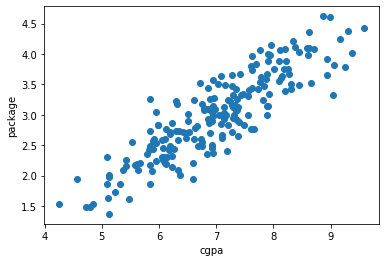

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [6]:
x = df['cgpa']
y = df['package']

In [7]:
x

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

Text(0, 0.5, 'package')

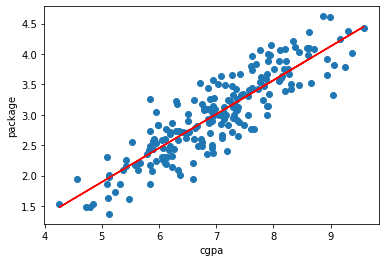

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train.values.reshape(-1,1),lr.predict(x_train.values.reshape(-1,1)),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [13]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [14]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [17]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [18]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [19]:
print("R2-Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2-Score 0.780730147510384


In [20]:
print("Adjusted R2-Score:",1 - ((1-r2)*(40-1)/(40-1-1)))

Adjusted R2-Score: 0.7749598882343415


In [21]:
# Adding one irrelevant feature to adjused R2 score cheque .

In [22]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.613707,3.26
1,5.12,0.971128,1.98
2,7.82,0.343157,3.25
3,7.42,0.015009,3.67
4,6.94,0.793090,3.57


Text(0, 0.5, 'Package(in lpa)')

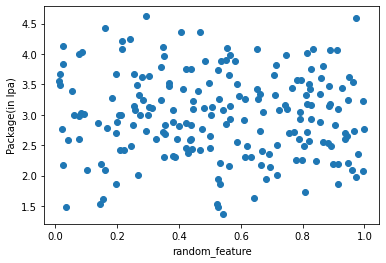

In [23]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [24]:
x1 = new_df1.iloc[:,0:2]
y1 = new_df1.iloc[:,-1]

In [25]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=2)

In [26]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((160, 2), (40, 2), (160,), (40,))

In [27]:
lr1 = LinearRegression()

In [28]:
lr1.fit(x_train1,y_train1)

LinearRegression()

In [29]:
y_pred1 = lr1.predict(x_test1)

In [30]:
print("R2 score",r2_score(y_test1,y_pred1))
r21 = r2_score(y_test1,y_pred1)

R2 score 0.7753376985883402


In [31]:
1 - ((1-r21)*(40-1)/(40-1-2))

0.7631937904039262

In [32]:
# Adding one relevant feature to adjused R2 score cheque .

In [33]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [34]:
new_df2.sample(5)

,cgpa,iq,package
146,6.07,1.46,2.46
150,6.30,1.83,2.73
125,7.33,2.46,3.16
86,7.61,2.27,2.77
179,7.14,2.83,3.03


Text(0, 0.5, 'Package(in lpa)')

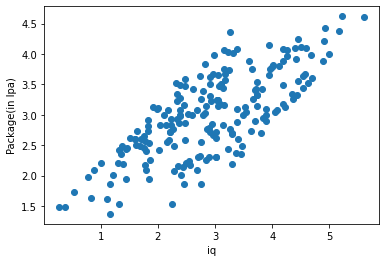

In [35]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [36]:
np.random.randint(-100,100)

-31

In [37]:
x2 = new_df2.iloc[:,0:2]
y2 = new_df2.iloc[:,-1]

In [38]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=2)

In [39]:
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((160, 2), (40, 2), (160,), (40,))

In [40]:
lr2 = LinearRegression()
lr2.fit(x_train2,y_train2)
y_pred2 = lr2.predict(x_test2)

In [41]:
print("R2 score",r2_score(y_test2,y_pred2))
r22 = r2_score(y_test2,y_pred2)

R2 score 0.8382963283466687


In [42]:
1 - ((1-r22)*(40-1)/(40-1-2))

0.8295555893383805

In [43]:
# The End. 